# TASK 1: Prediction using Supervised ML


## Predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?

### Author: Esha Ghorpade

In [2]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing the dataset from the url and creating a dataframe
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#using tail() to print last few columns
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#printing the dimensions of dataframe
print(data.shape)

(25, 2)


In [6]:
#getting an overall idea about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#getting information such as mean,count of the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


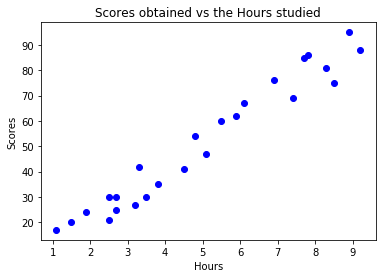

In [9]:
#now visualizing the data using a scatter plot
plt.scatter(x = data["Hours"], y = data["Scores"], color = "blue")
plt.title("Scores obtained vs the Hours studied")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [11]:
#splitting data into training data and testing data
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
#We will be using linear regression since we can observe a linear relationship between the data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

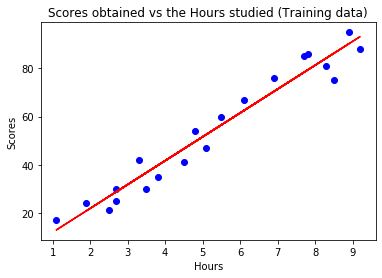

In [18]:
#visualizing the best fit line for training data
plt.scatter(x=X_train,y=y_train,color='blue')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title("Scores obtained vs the Hours studied (Training data)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [13]:
#predicting test results
y_pred=regressor.predict(X_test)

In [16]:
#comparing the predicted and actual values of test data
res =pd.DataFrame({'Predicted Scores':y_pred,'Actual Scores':y_test})
res

,Predicted Scores,Actual Scores
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


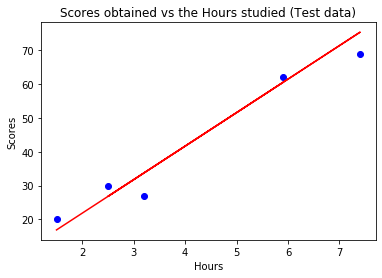

In [19]:
#visualizing the best fit line for test data
plt.scatter(x=X_test,y=y_test,color='blue')
plt.plot(X_test,y_pred,color='red')
plt.title("Scores obtained vs the Hours studied (Test data)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [31]:
#Now predicting the score obtained by a student who studies for 9.25 hrs per day
hours = np.array([9.25]).reshape(-1, 1)
marks = regressor.predict(hours)
print("For 9.25 hours, the predicted test score is", marks[0])

For 9.25 hours, the predicted test score is 93.69173248737538


In [33]:
#Evaluating the model
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))


Mean Squared Error: 21.5987693072174
Mean Absolute Error: 4.183859899002975
R2 Score: 0.9454906892105356


The metrics used to evaluate the model stand for:
MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.
    